# Spring Quarter 2019

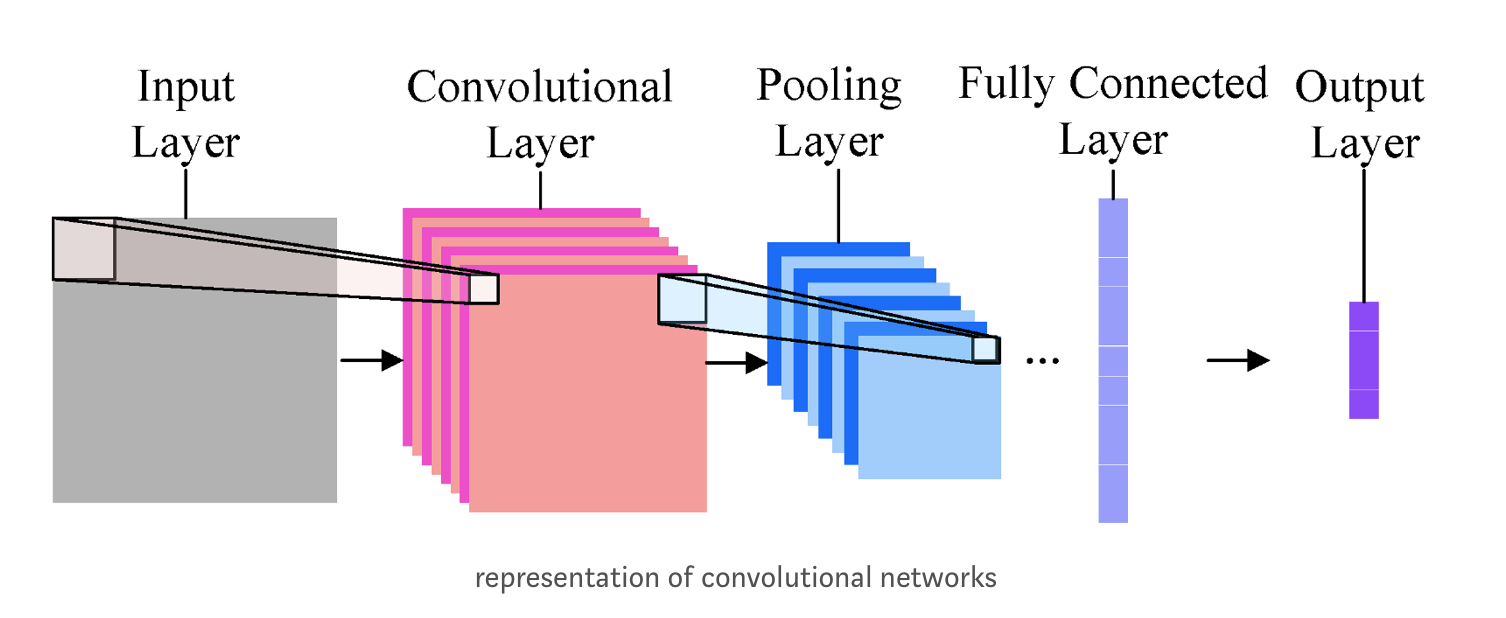

## Deep Learning Final Project -- Transfer Learning
##### Michael Colella and Rujuta Gandhi

### Import Necessary Modules and Dependencies

In [1]:
import os # used for navigating to image path

import pandas as pd
import numpy as np
import os
import keras
import imageio # used for writing images
import PIL
from PIL import Image # used for loading images
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

/Users/michaelcolella/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Import Mobile Net without last layer

-  Mobilenet is trained on the ImageNet dataset for a thousand classes

-  Put as many neurons in last layer of the network as the # of classes we wish to identify. So we discard the 1000 neuron layer and add our own last layer for the network.

-  This can be done by setting (IncludeTop=False) when importing the model.

In [2]:
# We import the MobileNet model without its last layer and add a few dense 
# layers so that our model can learn more complex functions

# Dense layers must have the relu activation function and the last layer,
# which contains as many neurons as the number of classes, must have the 
# softmax activation

base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

/Users/michaelcolella/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


### Our Model based on above architecture

In [3]:
model=Model(inputs=base_model.input,outputs=preds)
# specify the inputs
# specify the outputs
# now a model has been created based on our architecture

### Check architecture of our model

In [4]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

### Training only the Dense layers that were previously made

-  We will be using the pre-trained weights, that our model has been trained on (imagenet dataset), we have to set all the weights to be non-trainable. We will only be training the last Dense layers that we have made previously.

In [5]:
for layer in model.layers:
    layer.trainable=False

### Data requirements

-  Need a main data folder and inside that data folder, there must be a folder for each class of data containing the corresponding images. The names of the folders must be the names of their respective classes.

In [6]:
# ImageDataGenerators are inbuilt in keras and help us to train our model
# We just have to specify the path to our training data and it automatically 
# sends the data for training, in batches

# Training data is placed in specific format
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/Users/michaelcolella/Google Drive/Graduate School/MScA/Courses/Deep Learning and Image Recognition/Course Project/data/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 380 images belonging to 2 classes.


### Training the model on the data set

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size

In [8]:
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
11/11 [==============================] - 17s 2s/step - loss: 0.7147 - acc: 0.5284
Epoch 2/10
11/11 [==============================] - 16s 1s/step - loss: 0.7124 - acc: 0.5284
Epoch 3/10
11/11 [==============================] - 17s 2s/step - loss: 0.7174 - acc: 0.5085
Epoch 4/10
11/11 [==============================] - 14s 1s/step - loss: 0.7027 - acc: 0.5555
Epoch 5/10
11/11 [==============================] - 16s 1s/step - loss: 0.7098 - acc: 0.5256
Epoch 6/10
11/11 [==============================] - 16s 1s/step - loss: 0.7141 - acc: 0.5263
Epoch 7/10
11/11 [==============================] - 15s 1s/step - loss: 0.7067 - acc: 0.5246
Epoch 8/10
11/11 [==============================] - 17s 2s/step - loss: 0.7127 - acc: 0.5242
Epoch 9/10
11/11 [==============================] - 17s 2s/step - loss: 0.7115 - acc: 0.5057
Epoch 10/10
11/11 [==============================] - 16s 1s/step - loss: 0.7057 - acc: 0.5089


### Trained model can then be used to predict which class a new unseen image belongs to

-  Place name of new image in the place of new_image, given that you are still in your current working directory

In [ ]:
os.chdir('/Users/michaelcolella/Google Drive/Graduate School/MScA/Courses/Deep Learning and Image Recognition/Course Project/data/test/test_images/')

In [ ]:
# Read test image 
new_image = Image.open('test_image1.jpg') 

In [ ]:
# prints format of test image 
print(new_image.format) 

In [ ]:
# prints mode of image 
print(new_image.mode)

In [ ]:
# Output Images 
new_image.show()

In [ ]:
# adjust width and height to needs of model
width = 224
height = 224

new_image_adj = new_image.resize((width, height), Image.ANTIALIAS)

# saves image to working directory
new_image_adj.save('preprocessed_image' + '.jpg')

In [ ]:
# use model to predict on new image
# new, adjusted images is fed into model for prediction
model.predict(new_image_adj)